# Code for Implementing Vanilla Differential Privacy

Check [this paper](https://energyinformatics.springeropen.com/articles/10.1186/s42162-018-0025-3) as well.

***

In this notebook, we implement a standard differential privacy mechanism to protect aggregate statistics released sequentially over time.

This protection method is very similar to additive noise, with one key difference. Differential privacy adds noise that ignores the magnitude of the original data. This means series of counts that are in the tens will be perturbed as much as series that are in the thousands. On the other hand, additive noise perturbs based on the standard deviation of the original data, so it should result in higher utility for series with lower counts, and lower utility for series with higher counts. This is also dependent on the differential privacy budget $\epsilon$, where lower values impose higher privacy requirements, therefore more noise is added, and vice versa for higher values.

***

See [this paper](https://ieeexplore.ieee.org/abstract/document/6542629?casa_token=l9SCYx6a2X0AAAAA:jbacVw6_plp8_6gm5kM65Oh-uhl2Mu6SFp-3V__m9p9VKsB5a3kk0X7bQJU_4UeNgTMO4Xh2CA) for a description of the **Laplace Perturbation Algorithm**, which is what we implement here.

Note that the above paper also describes more sophisticated methods that achieve DP for time series: **Discrete Fourier Transform** and **FAST**. We can review and consider implementing these methods in the future in hope of obtaining higher data utility.

***

Our most important assumption for this method is that time series are **series of counts**, i.e., sequential aggregate statistics, in order for this method to achieve differential privacy. For the purposes of testing, we treat the M4 competition series as series of counts.

The differential privacy guarantee is based on the addition of random noise drawn from a randomized mechanism, in this case the Laplace distribution, where the magnitude of the noise is determined by the sensitivity of the released data to the addition or removal of a single individual's data. Since we are considering time series as aggregate counts released in each time period $t$, the sensitivity of each count is 1.

Due to sequential composition, the sequence of differentially private count statistics, each drawn based on privacy budget $\epsilon$, provides $(\sum_t \epsilon_t)$-differential privacy.

Therefore, we can perturb each value in the series using draws from $Lap(0, T/\epsilon)$ such that the sequence provides $\epsilon$-differential privacy.

***

**Algorithm 1: Laplace Perturbation Algorithm (LPA)**

**Input:** Raw series $y$, privacy budget $\epsilon$

**Output:** Released series $\tilde{y}$

1. **for** each $t \in 0,\dots,T-1$ **do**
2.   $\tilde{y}_t \leftarrow$ perturb $y_t$ by $Lap(0, T/\epsilon)$ 

***

## Step 1: Import Modules and Data

In [1]:
# general modules
import numpy as np
import pandas as pd

# nice time series plots
from sktime.utils.plotting import plot_series

In [2]:
# import weekly finance series, skipping column names
Y = np.genfromtxt("../../../Data/Train/Clean/weekly_finance_clean.csv", delimiter = ',', skip_header = 1)

In [3]:
# store number of time series and number of time periods
num_series, num_periods = Y.shape

## Step 2: Define Laplace Perturbation Algorithm Function

In [4]:
def LPA(sensitive_series, privacy_budget):
    """
    Adds Laplace noise to a sensitive time series of aggregate counts based on a given privacy budget.

    :param sensitive_series: confidential time series of aggregate counts
    :param privacy_budget: privacy budget paramater for differential privacy (typically denoted epsilon)
    :return: differentially privacy time series of aggregate counts
    """
    # obtain the number of time periods
    T = len(sensitive_series)
    
    # draw random noise from laplace distribution
    noise = np.random.laplace(loc=0, scale=T/privacy_budget, size=T)
    
    # return perturbed series
    return sensitive_series + noise

In [5]:
Y_tilde = np.apply_along_axis(func1d=LPA, axis=1, arr=Y, privacy_budget=1)

In [6]:
Y_tilde, Y = pd.DataFrame(Y_tilde), pd.DataFrame(Y)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='0'>)

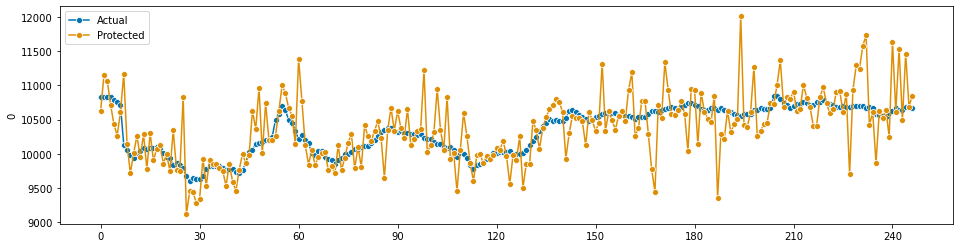

In [7]:
plot_series(Y.iloc[0,:], Y_tilde.iloc[0,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='1'>)

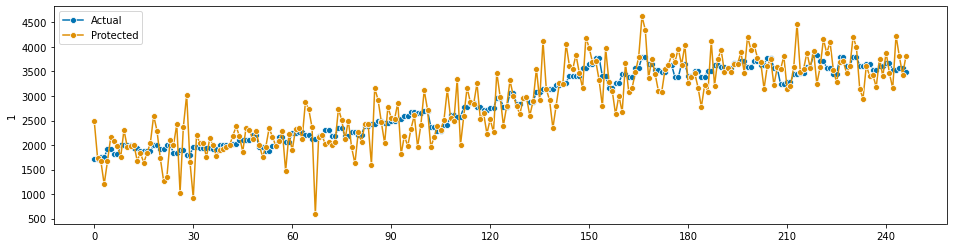

In [8]:
plot_series(Y.iloc[1,:], Y_tilde.iloc[1,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='5'>)

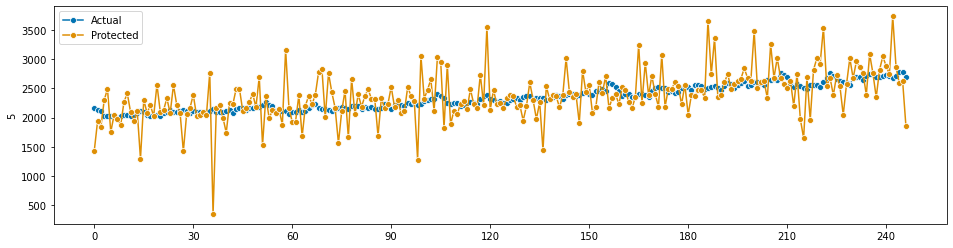

In [9]:
plot_series(Y.iloc[5,:], Y_tilde.iloc[5,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='18'>)

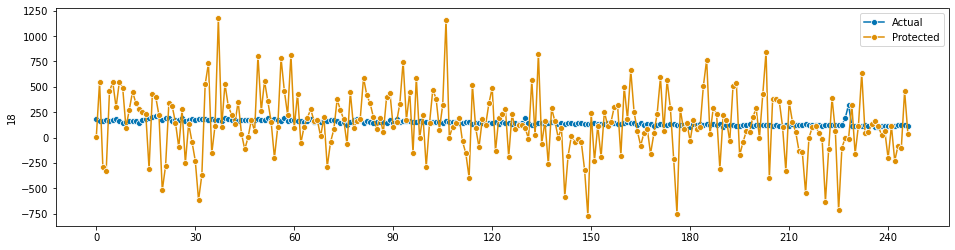

In [10]:
plot_series(Y.iloc[18,:], Y_tilde.iloc[18,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='19'>)

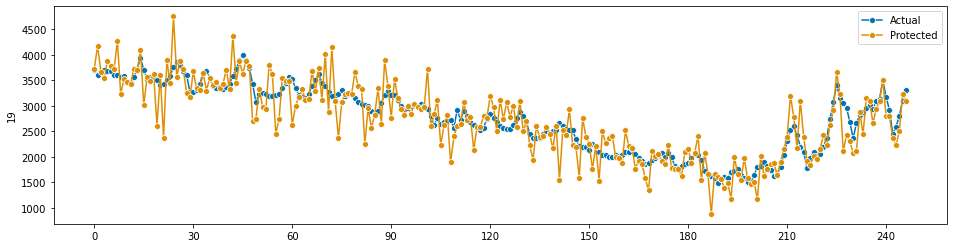

In [11]:
plot_series(Y.iloc[19,:], Y_tilde.iloc[19,:], labels=["Actual", "Protected"])